In [1]:
# From:
# https://datascience.stackexchange.com/questions/48390/how-to-build-an-image-dataset-for-cnn

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np

In [3]:
#---------------#
# Load the data #
#---------------#

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [6]:
print('Training data shape: ', x_train.shape)
print('Testing data shape: ', x_test.shape)

Training data shape:  (60000, 28, 28)
Testing data shape:  (10000, 28, 28)


In [7]:
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAvgPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K

In [8]:
#--------------#
# Reshape Data #
#--------------#

# Add channel dimension to numpy matrix
# One-hot encode labels
# 10 output neurons

In [9]:
# The known number of output classes.
num_classes = 10

# Input image dimensions
img_rows, img_cols = 28, 28

# Channels go last for TensorFlow backend
# Just adding 
x_train_reshaped = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_reshaped = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Convert class vectors to binary class matrices. 
# This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print("Before reshaping: ", x_train.shape)
# (60000, 28, 28)

print("After reshaping: ", x_train_reshaped.shape)
# (60000, 28, 28, 1)

Before reshaping:  (60000, 28, 28)
After reshaping:  (60000, 28, 28, 1)


In [11]:
#--------------#
# Design Model #
#--------------#

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [ ]:
#-------------#
# Train Model #
#-------------#

In [14]:
epochs = 4
batch_size = 128

# Fit the model weights.
model.fit(
    x_train_reshaped,
    y_train_binary,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test_reshaped, y_test_binary)
)
          

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.2429 - accuracy: 0.9267 - val_loss: 0.0514 - val_accuracy: 0.9850
Epoch 2/4
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0909 - accuracy: 0.9729 - val_loss: 0.0390 - val_accuracy: 0.9869
Epoch 3/4
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.0356 - val_accuracy: 0.9880
Epoch 4/4
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.0331 - val_accuracy: 0.9896


In [15]:
# loss: 0.0085
# accuracy: 0.9981 
# val_loss: 14416.47
# val_accuracy: 0.0980

# y_train vs x_test
# what did the previous output look like?

In [20]:
import matplotlib.pyplot as plt

In [21]:
my_0 = np.array(tf.keras.preprocessing.image.load_img('datasets/digits/hand_0.jpg', color_mode='grayscale', target_size=(28, 28), interpolation='box'))
my_2 = np.array(tf.keras.preprocessing.image.load_img('datasets/digits/hand_2.jpg', color_mode='grayscale', target_size=(28, 28), interpolation='box'))
my_5 = np.array(tf.keras.preprocessing.image.load_img('datasets/digits/hand_5.jpg', color_mode='grayscale', target_size=(28, 28), interpolation='box'))
my_7 = np.array(tf.keras.preprocessing.image.load_img('datasets/digits/hand_7.jpg', color_mode='grayscale', target_size=(28, 28), interpolation='box'))
my_9 = np.array(tf.keras.preprocessing.image.load_img('datasets/digits/hand_9.jpg', color_mode='grayscale', target_size=(28, 28), interpolation='box'))

In [22]:
my_digits = np.array([my_0, my_2, my_5, my_7, my_9])

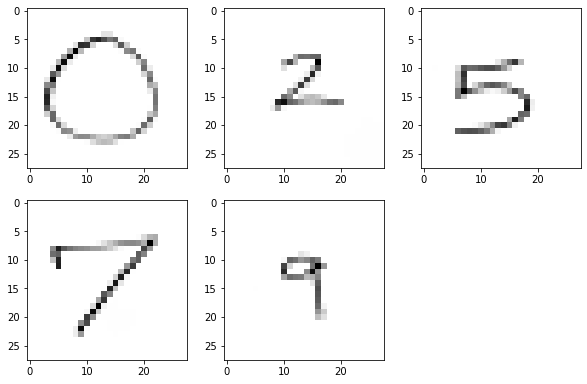

In [23]:
plt.figure(figsize=(10, 10))
for i, path in enumerate(my_digits):
    plt.subplot(3, 3, i+1)
    plt.imshow(path, cmap='gray')
plt.show()

In [24]:
my_digits = my_digits.astype('float32') / 255.

In [25]:
# Invert black/white
my_digits = my_digits * -1 + 1

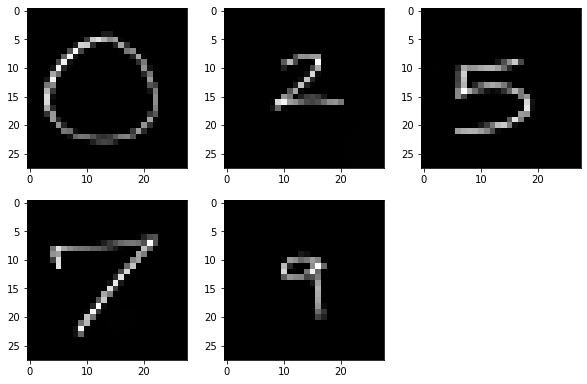

In [26]:
plt.figure(figsize=(10, 10))
for i, path in enumerate(my_digits):
    plt.subplot(3, 3, i+1)
    plt.imshow(path, cmap='gray')
plt.show()

In [27]:
my_digits.shape

(5, 28, 28)

In [28]:
my_digits_reshaped = my_digits.reshape(my_digits.shape[0], img_rows, img_cols, 1)

In [29]:
my_digits_reshaped.shape

(5, 28, 28, 1)

In [30]:
preds = model.predict(my_digits_reshaped)

In [31]:
for x in preds:
    pred = np.argmax(x)
    print(x, '\n')
    print(pred, '\n\n\n')

[0.18097761 0.01477003 0.07880157 0.15368156 0.01253398 0.02592279
 0.01550766 0.02304042 0.20346549 0.29129896] 

9 



[0.01147197 0.04179603 0.24996048 0.34806168 0.02695424 0.01799178
 0.00673244 0.23881239 0.0202729  0.0379461 ] 

3 



[0.00132699 0.00719383 0.01206736 0.4274382  0.00803023 0.4686272
 0.01457262 0.00561066 0.01108988 0.04404299] 

5 



[0.00150548 0.05538804 0.03284069 0.01541135 0.01894991 0.00265821
 0.00086703 0.844318   0.01918483 0.00887658] 

7 



[0.02544414 0.05522792 0.05882608 0.24143834 0.06672956 0.09250633
 0.03393559 0.06792676 0.05794377 0.3000214 ] 

9 



